# Steel Plate Defect Prediction Using Deep Learning

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [188]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [189]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [191]:
train.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

In [193]:
test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

### The test data seems to have less columns than the training data so to make sure we train our model to be able to predict the test data we will subset only the columns the test dataset contains 

In [194]:
def get_class(row):
    class_columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
    for col in class_columns:
        if row[col] == 1:
            return col

# Apply the function to each row to get the class name
train['class'] = train.apply(get_class, axis=1)

In [195]:
class_counts = train['class'].value_counts()

# Find the minimum count among all classes
min_count = class_counts.min()

# Sample equal number of data points from each class
balanced_data = pd.concat([train[train['class'] == cls].sample(min_count) for cls in class_counts.index])

# Shuffle the balanced dataset
train = balanced_data.sample(frac=1).reset_index(drop=True)

In [196]:
targets = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
test_cols = test.columns

target = train[targets]
train = train[test_cols]

In [197]:
train = train[['Pixels_Areas', 'Sum_of_Luminosity', 'Length_of_Conveyer', 'Outside_X_Index', 'LogOfAreas']]

In [198]:
train

,Pixels_Areas,Sum_of_Luminosity,Length_of_Conveyer,Outside_X_Index,LogOfAreas
0,55,7151,1353,0.0126,1.7404
1,6,718,1358,0.0029,0.7782
2,788,68851,1353,0.0095,2.8921
3,163,18674,1354,0.0044,2.2122
4,17,2167,1360,0.0044,1.2305
...,...,...,...,...,...
3390,170,17042,1353,0.0126,2.2304
3391,74,9120,1373,0.0073,1.8692
3392,67,8605,1356,0.0088,1.8261
3393,67,7479,1356,0.0110,1.8261


In [199]:
train = pd.concat([train.reset_index(), target.reset_index()], axis=1)

train = train.drop(['id', 'index'], axis=1)

In [200]:
train.describe()

,index,Pixels_Areas,Sum_of_Luminosity,Length_of_Conveyer,Outside_X_Index,LogOfAreas,index,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,3395.000000,3395.000000,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,1697.000000,1320.460383,1.608937e+05,1434.526362,0.024737,2.346403,1697.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.143741
std,980.196409,3015.780538,4.605239e+05,133.966111,0.040358,0.773722,980.196409,0.349979,0.349979,0.349979,0.349979,0.349979,0.349979,0.350878
min,0.000000,6.000000,2.500000e+02,1308.000000,0.002200,0.778200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,848.500000,71.000000,7.968000e+03,1358.000000,0.005900,1.851300,848.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1697.000000,149.000000,1.659300e+04,1360.000000,0.008700,2.173200,1697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2545.500000,546.000000,5.982550e+04,1400.000000,0.014800,2.734800,2545.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3394.000000,20894.000000,1.159141e+07,1715.000000,0.569200,4.316500,3394.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
X_train = train.drop(['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], axis=1)
y_train = train[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [ ]:
class DataPipeLine():
    def __init__(self, x):
        self.x = x
        self.pipe = make_pipeline(StandardScaler())

    def transform(self):
        transformed_data = self.pipe.fit_transform(self.x)
        return tf.convert_to_tensor(transformed_data)

# Model Creation

#### Creating Validation Dataset

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

In [ ]:
X_train = DataPipeLine(X_train).transform()
X_valid = DataPipeLine(X_valid).transform()
y_train = tf.convert_to_tensor(y_train)
y_valid = tf.convert_to_tensor(y_valid)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3055, 27)
(3055, 7)


In [ ]:
y_valid

<tf.Tensor: shape=(340, 7), dtype=int64, numpy=
array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)>

### Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier


RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
importances = RFC.feature_importances_

<AxesSubplot: >

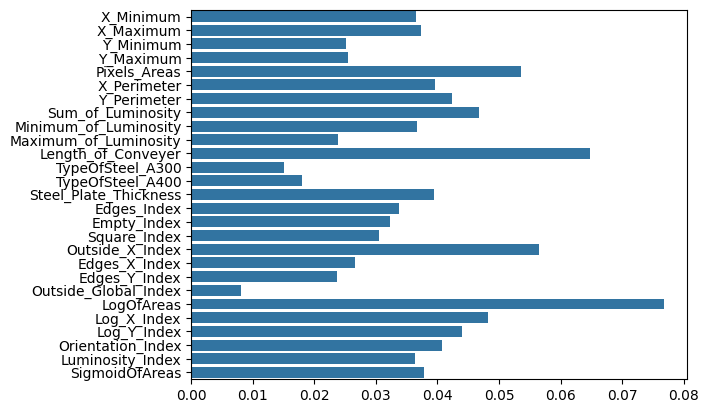

In [ ]:
sns.barplot(x=RFC.feature_importances_, y=RFC.feature_names_in_)

In [ ]:
input_shape = (27, )
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

Model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(units=19219, activation=leaky_relu, kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(units=19219, activation=leaky_relu, kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(units=9610, activation=leaky_relu, kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(units=9610, activation=leaky_relu, kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(units=4805, activation=leaky_relu, kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(units=2403, activation=leaky_relu, kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(units=7, activation='softmax')
])

In [ ]:
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

Model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100)

# Model Evaluation

# Conclusion